In [ ]:
import pandas as pd
import numpy as np
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#Load the dataset
df1= pd.read_csv("/content/BTC_DATA_1h_2024.csv")
#Display the last few rows to inspect the data
df1.tail()

timestamp      open      high       low     close  \
35995  2024-02-10 03:00:00  47311.40  47504.00  47311.39  47376.62   
35996  2024-02-10 04:00:00  47376.62  47430.03  47313.29  47409.50   
35997  2024-02-10 05:00:00  47409.49  47421.29  47255.39  47326.83   
35998  2024-02-10 06:00:00  47326.82  47350.00  47265.69  47349.99   
35999  2024-02-10 07:00:00  47349.99  47352.98  47145.40  47151.72   

           volume  quote_asset_volume      RSI14      RSI30     RSI200  ...  \
35995  1148.05953        5.442332e+07  64.338371  66.940151  57.812241  ...   
35996   534.44554        2.531818e+07  64.954142  67.190281  57.866709  ...   
35997   489.20761        2.317098e+07  62.052919  65.893557  57.678532  ...   
35998   473.08547        2.238342e+07  62.557481  66.083258  57.717246  ...   
35999   658.55420        3.112403e+07  55.726246  62.980959  57.266529  ...   

              EMA12         EMA26        MACD     PROC9     Low14   High14  \
35995  47256.180028  46871.998340  384.181688 -0.473468  46652.00  48200.0   
35996  47279.767716  46911.813278  367.954438 -0.210442  46765.44  48200.0   
35997  47287.008067  46942.555257  344.452810 -0.388245  47035.92  48200.0   
35998  47296.697595  46972.735608  323.961987 -0.331023  47035.92  48200.0   
35999  47274.393350  46985.993711  288.399638 -0.255729  47035.92  48200.0   

              %K       %K10       %K30      %K200  
35995  46.810078  51.327428  72.755821  59.617938  
35996  44.895996  48.454363  72.048810  59.444377  
35997  24.990550  44.292764  70.625060  59.139735  
35998  26.980104  40.417193  69.266140  58.908201  
35999   9.947770  34.878371  66.668710  58.533370  

[5 rows x 25 columns]

In [ ]:
# Calculate the 10-period Exponential Moving Average (EMA) of the 'open' price
df1['EMA_Open_10'] = df1['open'].ewm(span=10, adjust=False).mean()


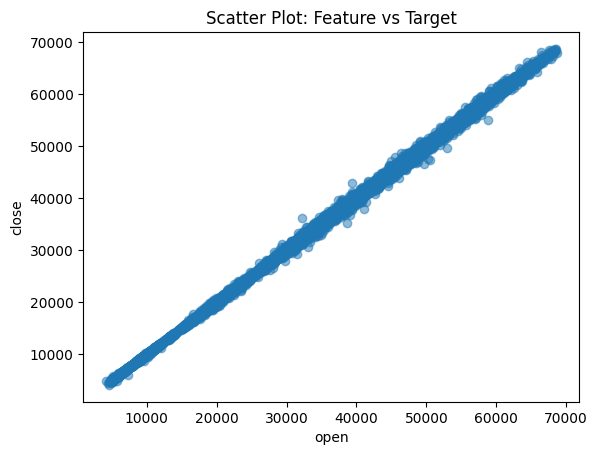

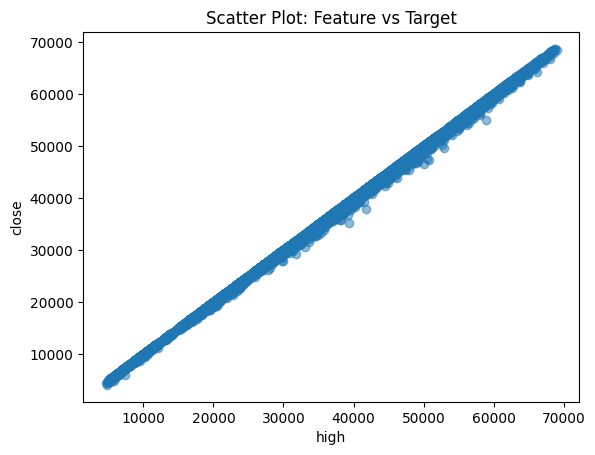

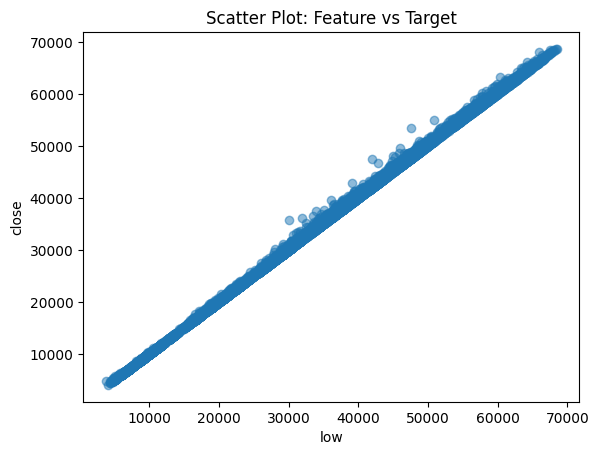

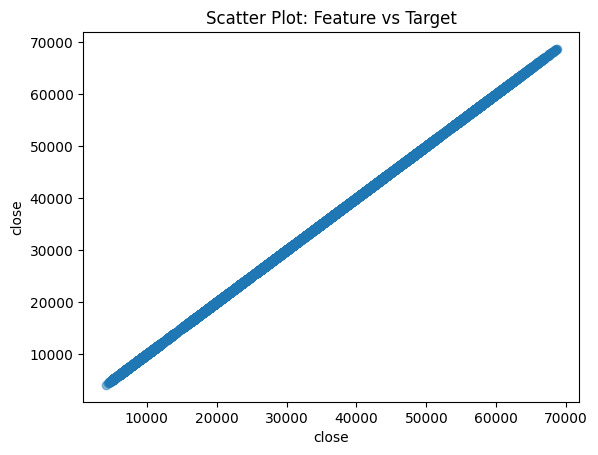

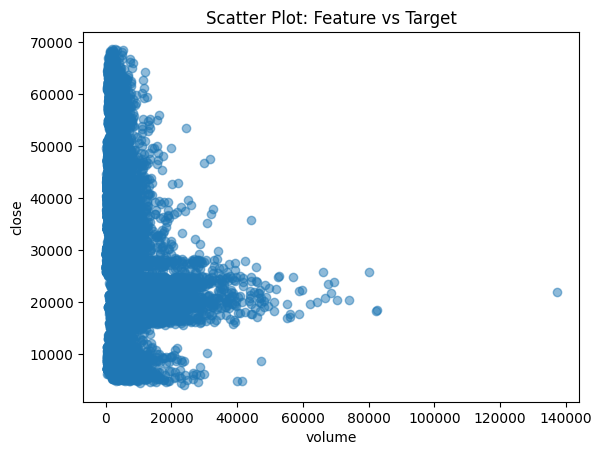

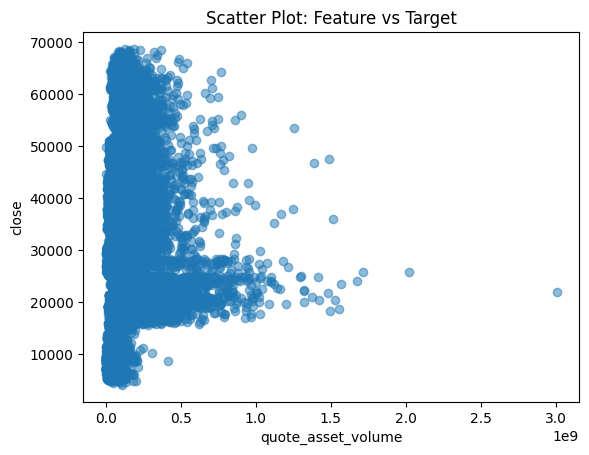

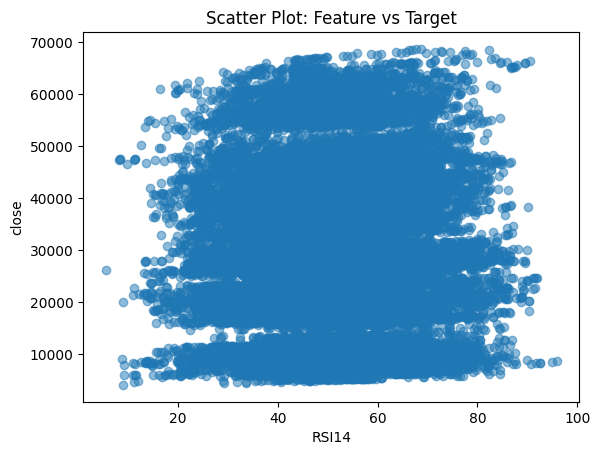

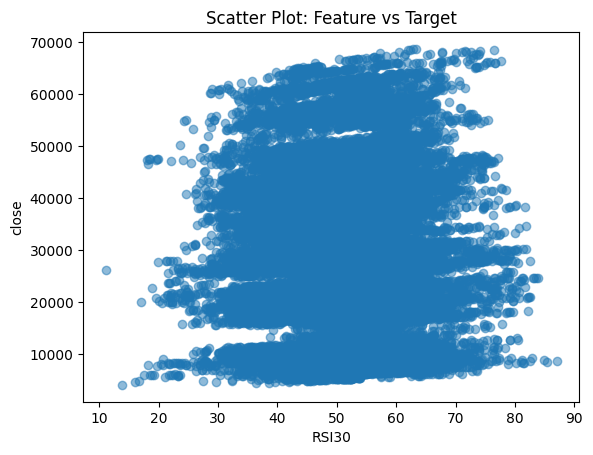

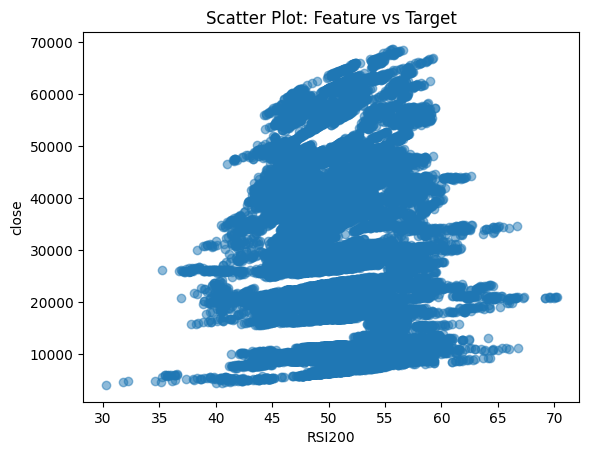

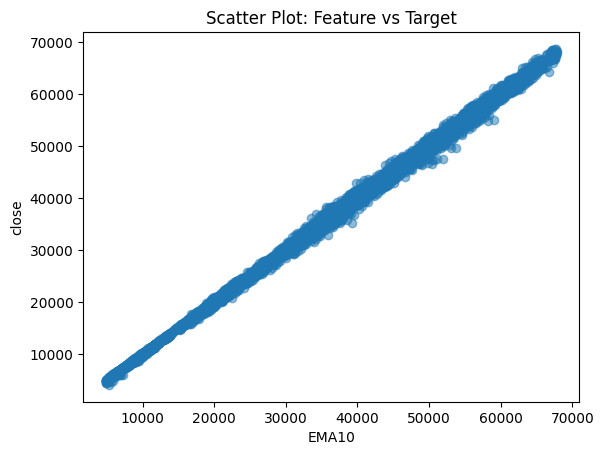

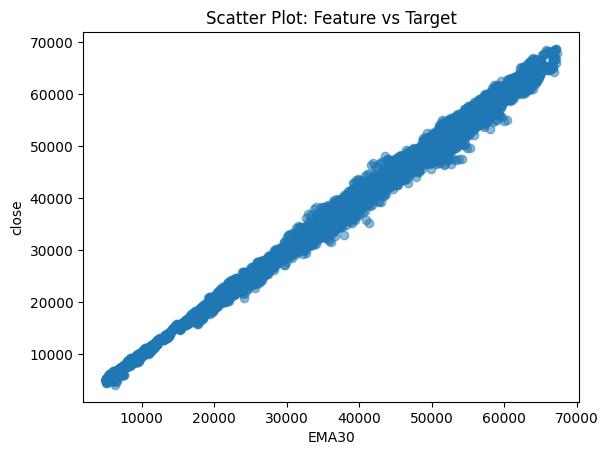

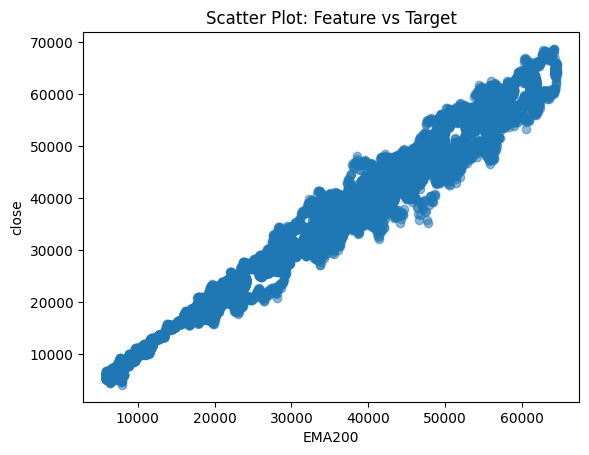

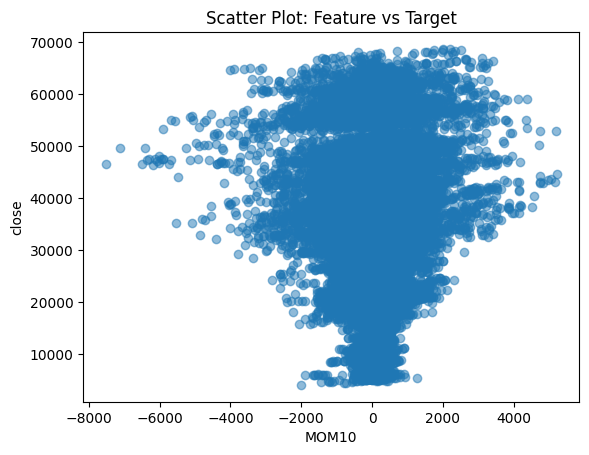

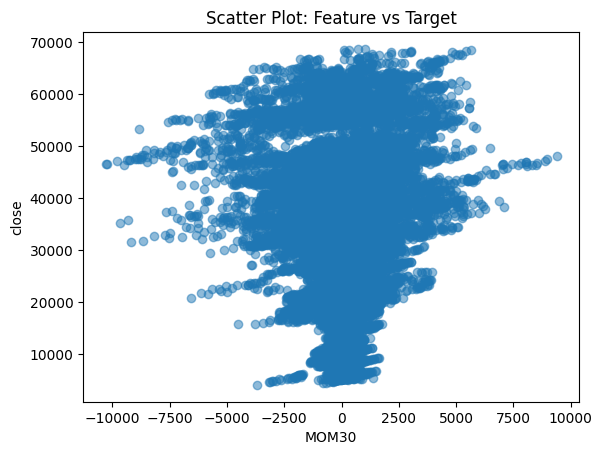

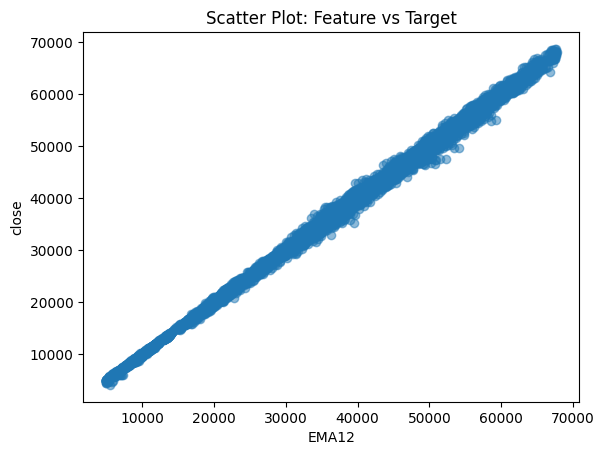

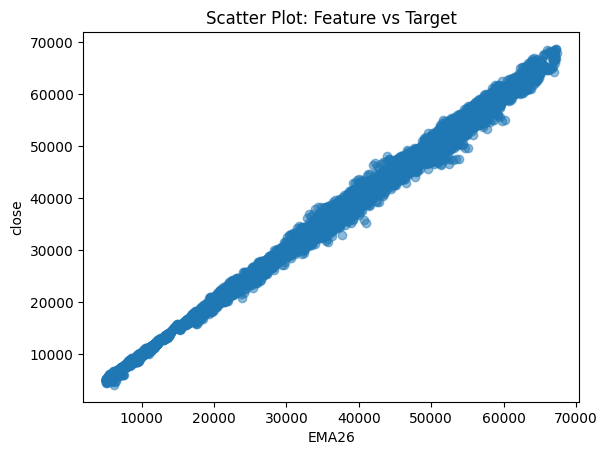

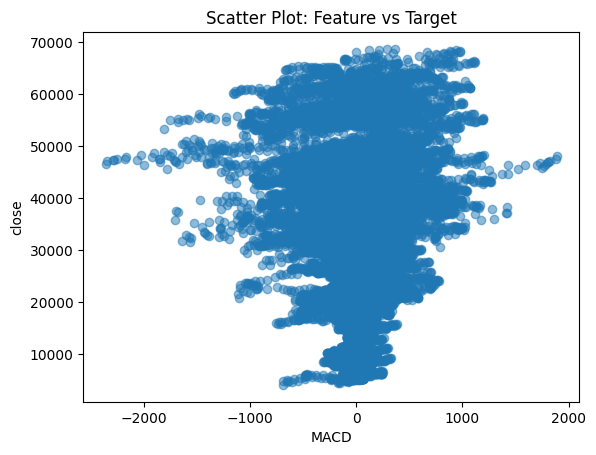

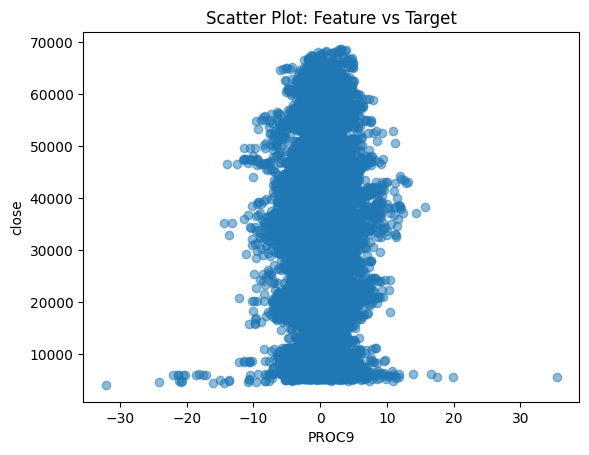

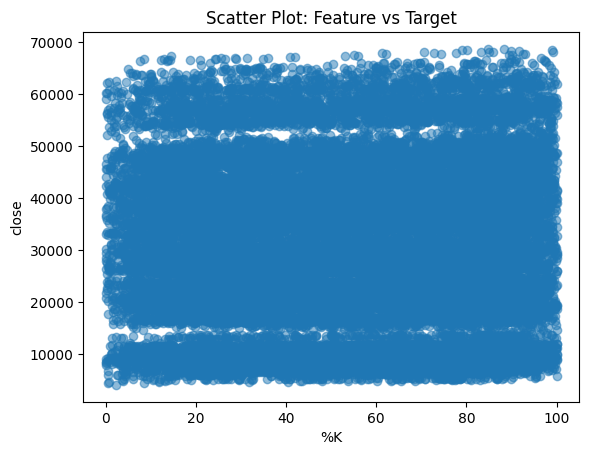

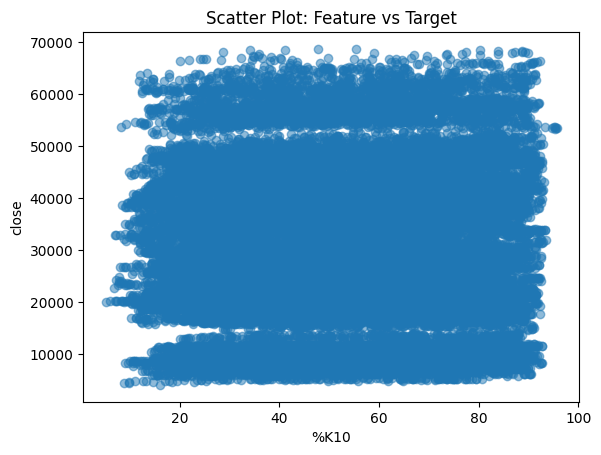

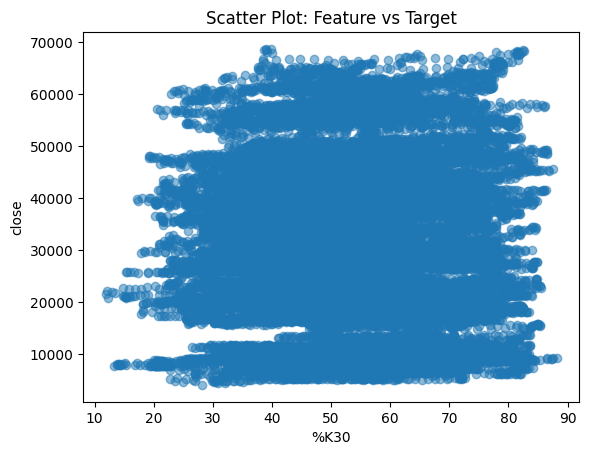

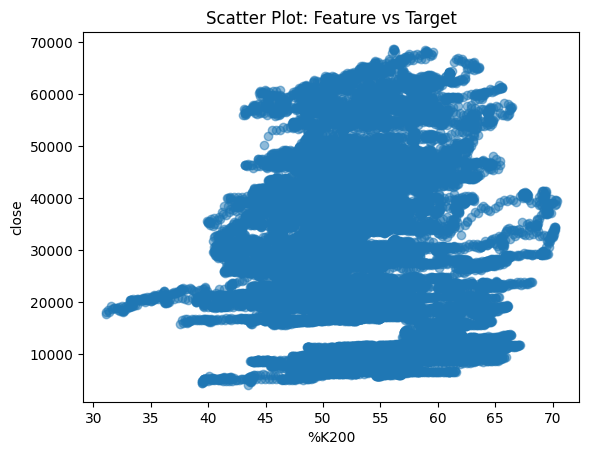

In [ ]:
import matplotlib.pyplot as plt
# Define the columns to plot
columns= ['open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'RSI14', 'RSI30', 'RSI200', 'EMA10', 'EMA30',
       'EMA200', 'MOM10', 'MOM30', 'EMA12', 'EMA26', 'MACD', 'PROC9',
       '%K', '%K10', '%K30', '%K200']
#Create scatter plots for each feature against the 'close' price
for col in columns:
    plt.scatter(df1[col], df1['close'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('close')
    plt.title('Scatter Plot: Feature vs Target')
    plt.show()


In [ ]:
# Calculate and print the mean and standard deviation of the 'close' price
close_mean= df1['close'].mean()
close_std= df1['close'].std()
print (close_mean)
print (close_std)

29237.43313166667
15074.52244455303


In [ ]:
# Calculate and print the mean and standard deviation of the 'oprn' price
open_mean= df1['open'].mean()
open_std= df1['open'].std()
print (open_mean)
print (open_std)

29236.322774722223
15074.67499683942


In [ ]:
# Calculate and print the mean and standard deviation of the 'high' price
high_mean= df1['high'].mean()
high_std= df1['high'].std()
print (high_mean)
print (high_std)

29377.686377222228
15160.52609209132


In [ ]:
# Calculate and print the mean and standard deviation of the 'low' price
low_mean= df1['low'].mean()
low_std= df1['low'].std()
print (low_mean)
print (low_std)

29087.380896666666
14983.669243924282


In [ ]:
# Calculate and print the mean and standard deviation of the 'volume'
volume_mean= df1['volume'].mean()
volume_std= df1['volume'].std()
print (volume_mean)
print (volume_std)

3972.8727729159164
5069.850531373775


In [ ]:
# heiken_ashi_df = pd.DataFrame(index=df1.index)

# heiken_ashi_df['ha_close'] = (df1['open'] + df1['high'] + df1['low'] + df1['close']) / 4

# heiken_ashi_df['ha_open'] = 0.0
# heiken_ashi_df['ha_open'].iloc[0] = (df1['open'].iloc[0] + df1['close'].iloc[0]) / 2

# for i in range(1, len(heiken_ashi_df)):
#     heiken_ashi_df['ha_open'].iloc[i] = (heiken_ashi_df['ha_open'].iloc[i-1] + heiken_ashi_df['ha_close'].iloc[i-1]) / 2

# heiken_ashi_df['ha_high'] = pd.concat([df1['high'], heiken_ashi_df['ha_open'], heiken_ashi_df['ha_close']], axis=1).max(axis=1)
# heiken_ashi_df['ha_low'] = pd.concat([df1['low'], heiken_ashi_df['ha_open'], heiken_ashi_df['ha_close']], axis=1).min(axis=1)

# heiken_ashi_df.to_csv("heiken_ashi.csv", index=False)
# print("CSV file 'heiken_ashi.csv' saved successfully.")


In [ ]:
# ha= pd.read_csv("/content/heikin_ashi.csv")
# ha.tail()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Define the columns to be scaled
columns= ['open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'RSI14', 'RSI30', 'RSI200', 'EMA10', 'EMA30',
       'EMA200', 'MOM10', 'MOM30', 'EMA12', 'EMA26', 'MACD', 'PROC9',
       '%K', '%K10', '%K30', '%K200','EMA_Open_10']
# Initialize StandardScaler
scaler = StandardScaler()
# Scale the selected columns in the DataFrame
df1[columns] = scaler.fit_transform(df1[columns])

In [ ]:
# Drop rows with missing values
df1.dropna(inplace=True)

# Define features (X) and target (y) for 'close' price prediction
X = df1[['volume',
       'quote_asset_volume', 'RSI14', 'RSI30', 'RSI200', 'MOM10', 'MOM30', 'MACD',
        'PROC9', 'EMA10', 'EMA30', 'EMA200',
       '%K10', '%K30', '%K200']]
y = df1[['close']]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
#Predicting close price
# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=400, learning_rate=0.1, max_depth=4, subsample=0.8, colsample_bytree=0.8)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_close = model.predict(X_test)

# Evaluate the model
print ("Error on normalized data:")
mse_close = mean_squared_error(y_test, y_pred_close)
print(f'MSE: {mse_close}')

rmse_close = np.sqrt(mse_close)
print(f"RMSE: {rmse_close}")

r2_score_close= r2_score(y_test, y_pred_close)
print(f"R2 Score: {r2_score_close}")

mae_close = mean_absolute_error(y_test, y_pred_close)
print(f"MAE: {mae_close}")

# Calculate and print final error metrics (unscaled)
print ("\nFinal error:")
print ("MAE ", mae_close*close_std)
print ("RMSE ", rmse_close*close_std)

Error on normalized data:
MSE: 0.00048522261204198003
RMSE: 0.022027769111782065
R2 Score: 0.9974135756492615
MAE: 0.01378264557570219

Final error:
MAE  207.7668000762422
RMSE  332.0580998789907


In [ ]:
df1.dropna(inplace=True)

# Define features (X) and target (y) for 'open' price prediction
X = df1[[ 'volume',
       'quote_asset_volume', 'RSI14', 'RSI30', 'RSI200', 'MOM10', 'MOM30', 'MACD',
        'PROC9', 'EMA10', 'EMA30', 'EMA200',
       '%K10', '%K30', '%K200']]
y = df1[['open']]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
#Predicting open price
# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=400, learning_rate=0.1, max_depth=4, subsample=0.8, colsample_bytree=0.8)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_open = model.predict(X_test)

# Evaluate the model
print ("Error on normalized data:")
mse_open = mean_squared_error(y_test, y_pred_open)
print(f'MSE: {mse_open}')

rmse_open = np.sqrt(mse_open)
print(f"RMSE: {rmse_open}")

r2_score_open= r2_score(y_test, y_pred_open)
print(f"R2 Score: {r2_score_open}")

mae_open = mean_absolute_error(y_test, y_pred_open)
print(f"MAE: {mae_open}")

# Calculate and print final error metrics (unscaled)
print ("\nFinal error:")
print ("MAE ", mae_open*open_std)
print ("RMSE ", rmse_open*open_std)

Error on normalized data:
MSE: 0.0004979696241207421
RMSE: 0.022315233006194268
R2 Score: 0.9973437786102295
MAE: 0.01450470369309187

Final error:
MAE  218.6536940988164
RMSE  336.3948850471225


In [ ]:
df1.dropna(inplace=True)

# Define features (X) and target (y) for 'high' price prediction
X = df1[[ 'volume',
       'quote_asset_volume', 'RSI14', 'RSI30', 'RSI200', 'MOM10', 'MOM30', 'MACD',
        'PROC9', 'EMA10', 'EMA30', 'EMA200',
       '%K10', '%K30', '%K200']]
y = df1[['high']]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
#Predicting High
# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=400, learning_rate=0.1, max_depth=4, subsample=0.8, colsample_bytree=0.8)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_high = model.predict(X_test)

# Evaluate the model
print ("Error on normalized data:")
mse_high = mean_squared_error(y_test, y_pred_high)
print(f'MSE: {mse_high}')

rmse_high = np.sqrt(mse_high)
print(f"RMSE: {rmse_high}")

r2_score_high= r2_score(y_test, y_pred_high)
print(f"R2 Score: {r2_score_high}")

mae_high = mean_absolute_error(y_test, y_pred_high)
print(f"MAE: {mae_high}")

# Calculate and print final error metrics (unscaled)
print ("\nFinal error:")
print ("MAE ", mae_high*high_std)
print ("RMSE ", rmse_high*high_std)

Error on normalized data:
MSE: 0.00027634206344373524
RMSE: 0.016623539437909583
R2 Score: 0.9985243082046509
MAE: 0.0118300411850214

Final error:
MAE  179.34964805603187
RMSE  252.02160339133732


In [ ]:
df1.dropna(inplace=True)

# Define features (X) and target (y) for 'low' price prediction
X = df1[[ 'volume',
       'quote_asset_volume', 'RSI14', 'RSI30', 'RSI200', 'MOM10', 'MOM30', 'MACD',
        'PROC9', 'EMA10', 'EMA30', 'EMA200',
       '%K10', '%K30', '%K200']]
y = df1[['low']]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
#Predicting low
# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=400, learning_rate=0.1, max_depth=4, subsample=0.8, colsample_bytree=0.8)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_low = model.predict(X_test)

# Evaluate the model
print ("Error on normalized data:")
mse_low = mean_squared_error(y_test, y_pred_low)
print(f'MSE: {mse_low}')

rmse_low = np.sqrt(mse_low)
print(f"RMSE: {rmse_low}")

r2_score_low= r2_score(y_test, y_pred_low)
print(f"R2 Score: {r2_score_low}")

mae_low = mean_absolute_error(y_test, y_pred_low)
print(f"MAE: {mae_low}")

# Calculate and print final error metrics (unscaled)
print ("\nFinal error:")
print ("MAE ", mae_low*low_std)
print ("RMSE ", rmse_low*low_std)

Error on normalized data:
MSE: 0.00030519923893734813
RMSE: 0.01746995245950452
R2 Score: 0.9983739852905273
MAE: 0.01219132263213396

Final error:
MAE  182.67074596586366
RMSE  261.7639893602973


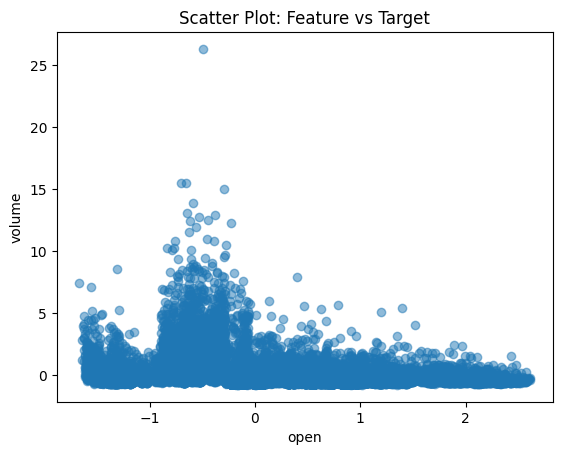

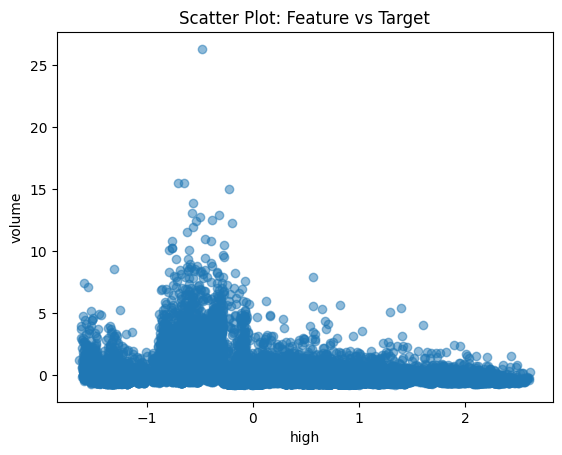

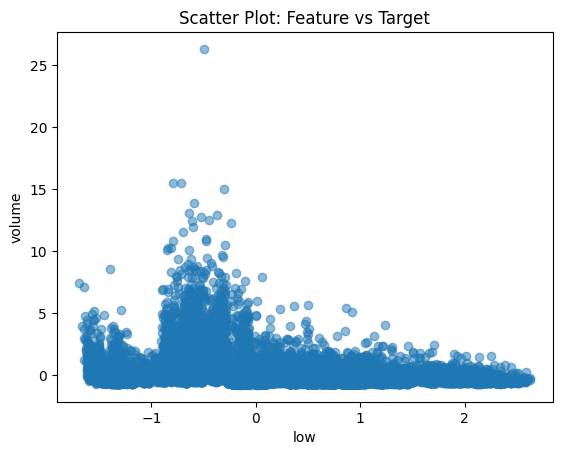

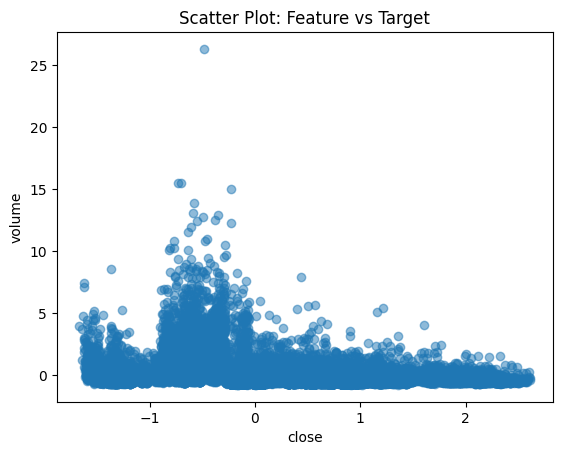

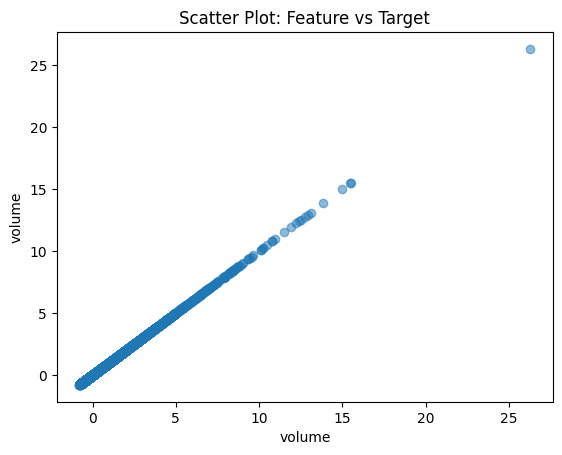

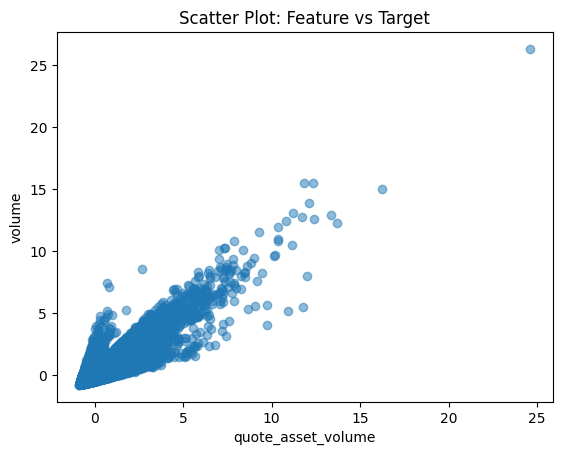

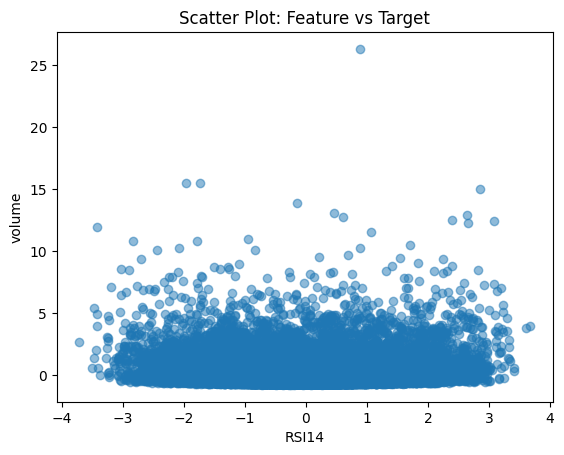

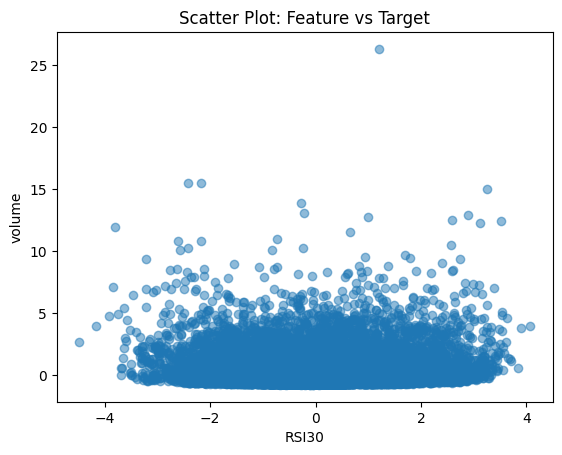

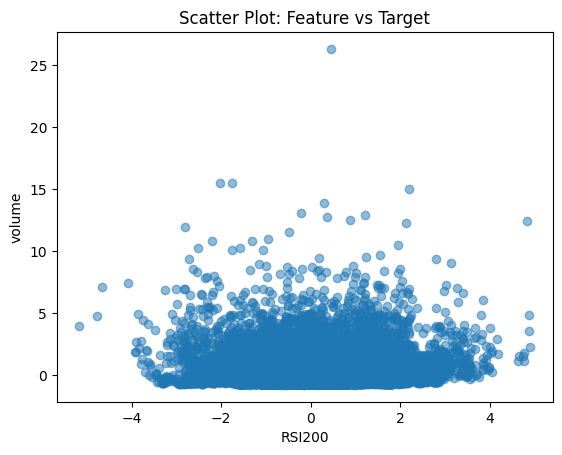

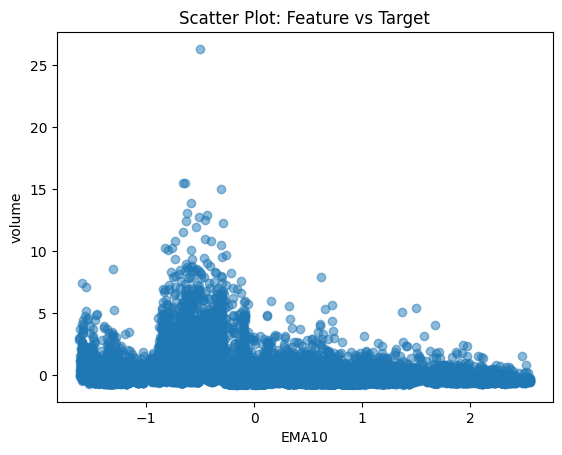

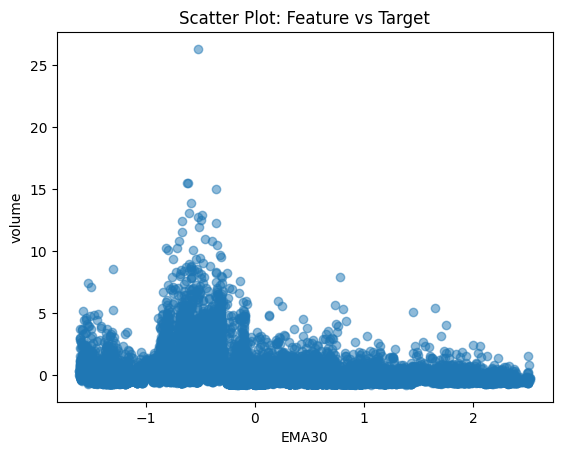

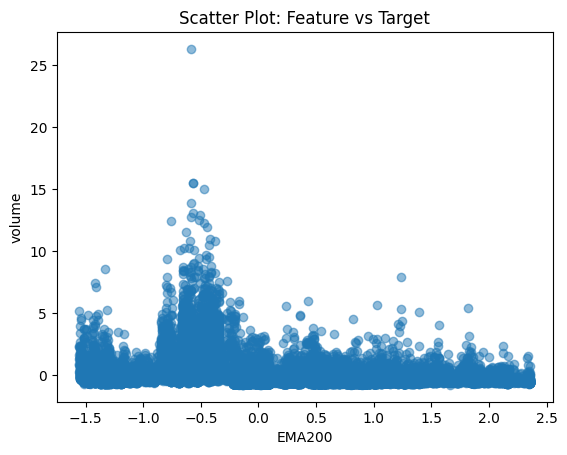

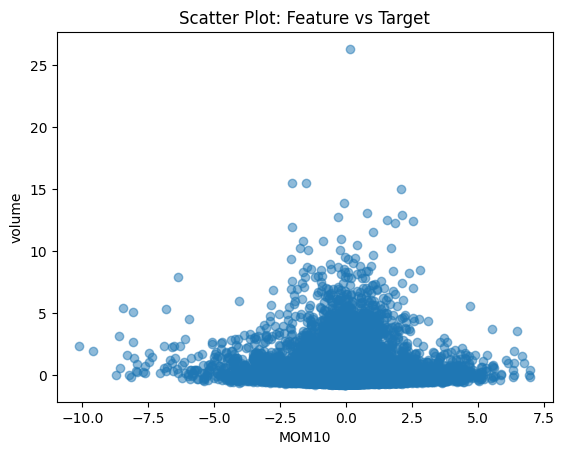

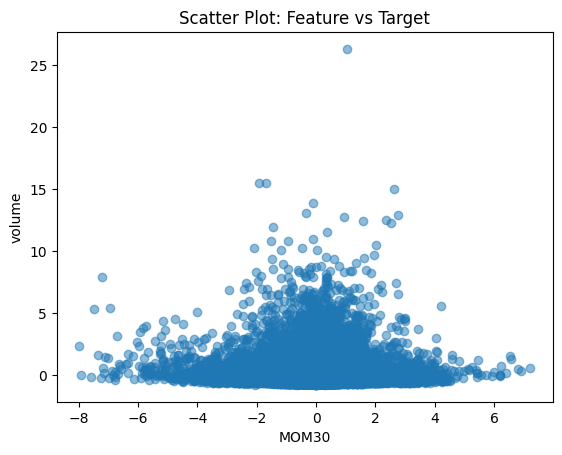

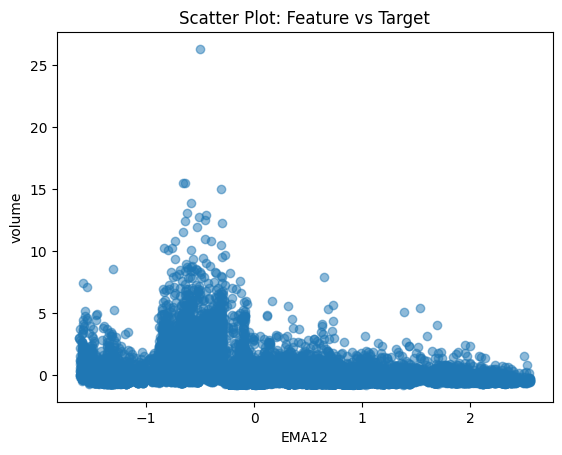

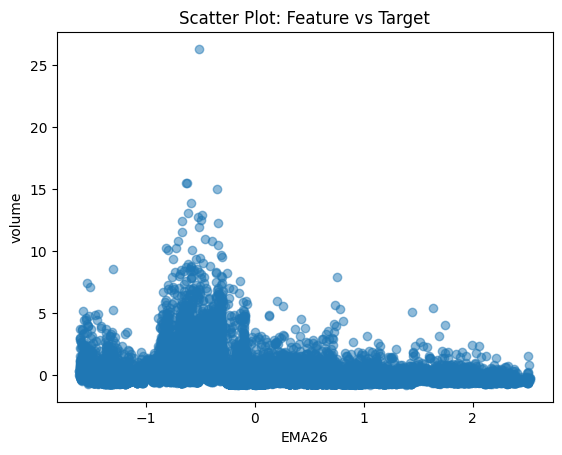

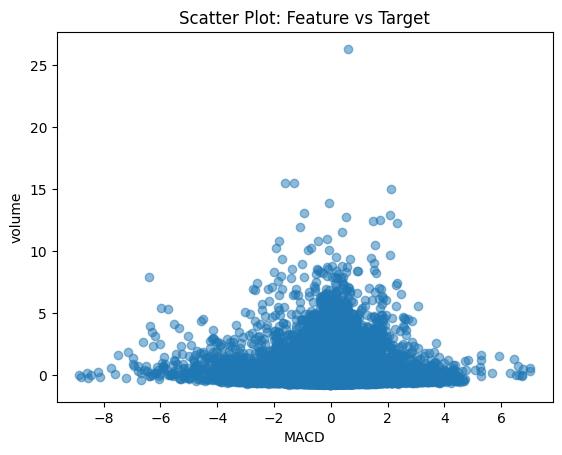

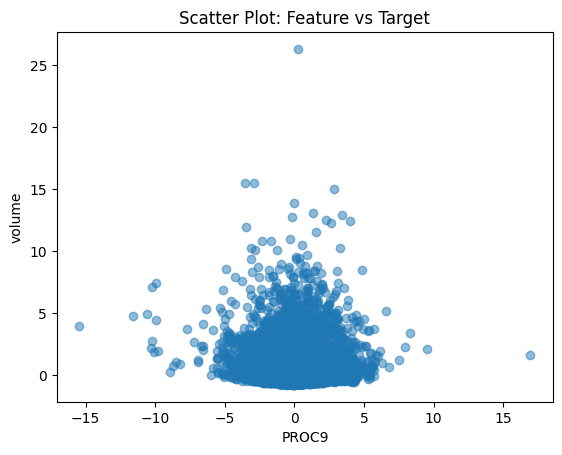

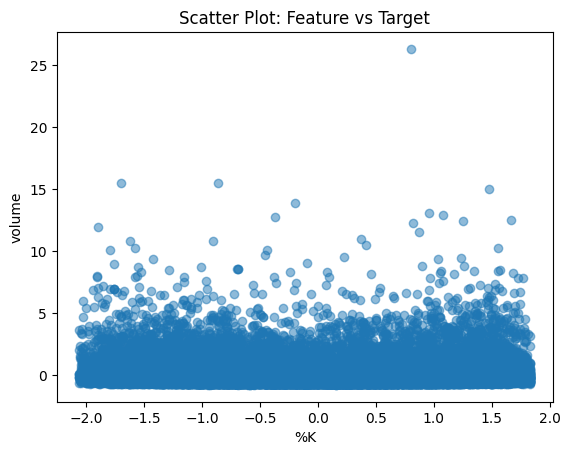

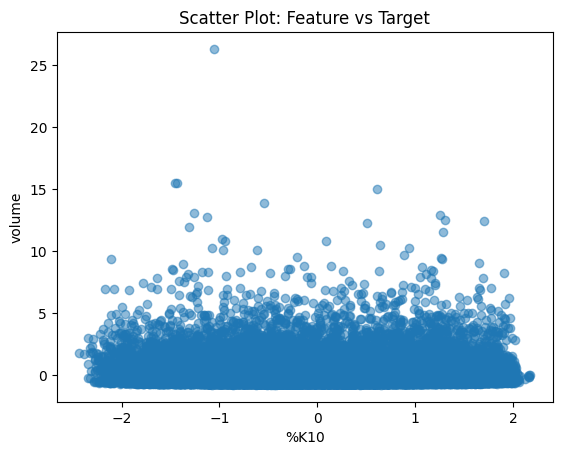

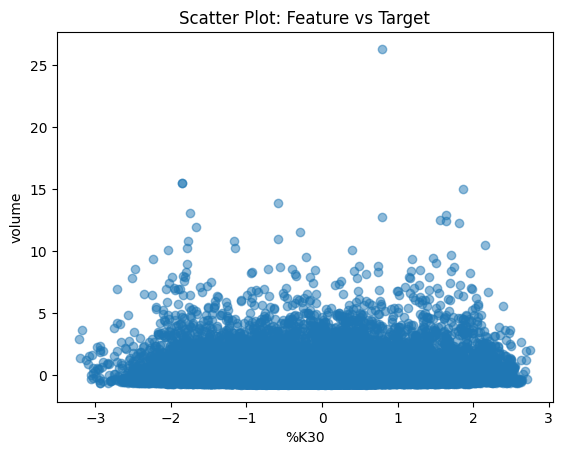

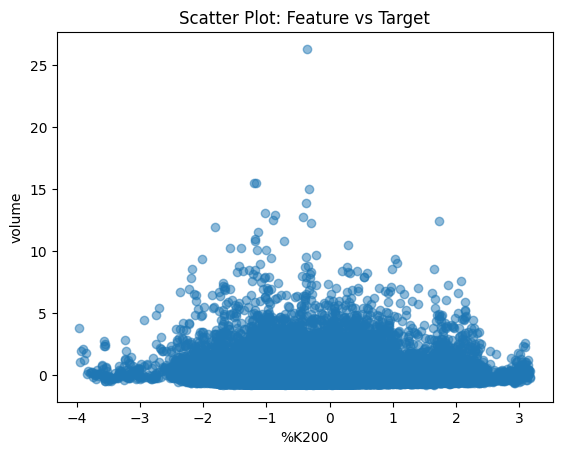

In [ ]:
import matplotlib.pyplot as plt
columns= ['open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'RSI14', 'RSI30', 'RSI200', 'EMA10', 'EMA30',
       'EMA200', 'MOM10', 'MOM30', 'EMA12', 'EMA26', 'MACD', 'PROC9',
       '%K', '%K10', '%K30', '%K200']
for col in columns:
    plt.scatter(df1[col], df1['volume'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('volume')
    plt.title('Scatter Plot: Feature vs Target')
    plt.show()

In [ ]:

X = df1[['quote_asset_volume','MOM10','MOM30' ,'EMA12','RSI14', 'RSI30', 'RSI200','EMA26', 'MACD']]
y = df1['volume']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
# Using MSE as the scoring metric since that's what we are trying to reduce
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative MSE for GridSearchCV
                           cv=3,  # Using 3-fold cross-validation
                           verbose=2,
                           n_jobs=-1) # Use all available cores

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding best score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MSE found: ", grid_search.best_score_)

# Train a new model with the best parameters
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print ("\nError on normalized data with best model:")
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'MSE: {mse_best}')

rmse_best = np.sqrt(mse_best)
print(f"RMSE: {rmse_best}")

r2_score_best = r2_score(y_test, y_pred_best)
print(f"R2 Score: {r2_score_best}")

mae_best = mean_absolute_error(y_test, y_pred_best)
print(f"MAE: {mae_best}")

print ("\nFinal error with best model:")
print ("MAE ", mae_best*volume_std)
print ("RMSE ", rmse_best*volume_std)

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 400, 'subsample': 0.9}
Best negative MSE found:  -0.14299850540871242

Error on normalized data with best model:
MSE: 0.0019166736513062312
RMSE: 0.04377983155867815
R2 Score: 0.9817525941195075
MAE: 0.01951365328011769

Final error with best model:
MAE  98.93130545124828
RMSE  221.95720229121878


In [ ]:
# Make predictions using the best model
y_pred_volume = best_model.predict(X_test)

In [ ]:
#Unscaling all predicted prices
y_pred_close_unscaled = y_pred_close * close_std + close_mean
y_pred_open_unscaled = y_pred_open * open_std + open_mean
y_pred_high_unscaled = y_pred_high * high_std + high_mean
y_pred_low_unscaled = y_pred_low * low_std + low_mean
y_pred_volume_unscaled = y_pred_volume * volume_std + volume_mean

#Creating a Predicted dataframe
predicted_df = pd.DataFrame(X_test.index, columns=['timestamp'])
predicted_df['open_predicted'] = y_pred_open_unscaled
predicted_df['high_predicted'] = y_pred_high_unscaled
predicted_df['low_predicted'] = y_pred_low_unscaled
predicted_df['close_predicted'] = y_pred_close_unscaled
predicted_df['close_predicted'] = y_pred_close_unscaled
predicted_df['volume_predicted'] = y_pred_volume_unscaled

# # Assuming y_pred_open_unscaled, y_pred_high_unscaled, y_pred_low_unscaled, y_pred_close_unscaled are your unscaled predictions

# # Create a temporary DataFrame for easier processing
# predicted_ohlc = pd.DataFrame({
#     'open': y_pred_open_unscaled,
#     'high': y_pred_high_unscaled,
#     'low': y_pred_low_unscaled,
#     'close': y_pred_close_unscaled
# })

# # Apply post-processing rules
# # Ensure High is the maximum of Open, High, Low, Close
# predicted_ohlc['high'] = predicted_ohlc[['open', 'high', 'low', 'close']].max(axis=1)

# # Ensure Low is the minimum of Open, High, Low, Close
# predicted_ohlc['low'] = predicted_ohlc[['open', 'high', 'low', 'close']].min(axis=1)

# # After ensuring High >= Low, you might still have issues with open/close relative to high/low
# # A more robust approach:
# # If open > high, set high = open
# # If close > high, set high = close
# predicted_ohlc['high'] = np.maximum(predicted_ohlc['high'], predicted_ohlc['open'])
# predicted_ohlc['high'] = np.maximum(predicted_ohlc['high'], predicted_ohlc['close'])

# # If open < low, set low = open
# # If close < low, set low = close
# predicted_ohlc['low'] = np.minimum(predicted_ohlc['low'], predicted_ohlc['open'])
# predicted_ohlc['low'] = np.minimum(predicted_ohlc['low'], predicted_ohlc['close'])


# # Now update your predicted_df with these corrected values
# predicted_df = pd.DataFrame(X_test.index, columns=['timestamp']) # Re-create predicted_df to ensure it's clean
# predicted_df['open_predicted'] = predicted_ohlc['open'].values
# predicted_df['high_predicted'] = predicted_ohlc['high'].values
# predicted_df['low_predicted'] = predicted_ohlc['low'].values
# predicted_df['close_predicted'] = predicted_ohlc['close'].values
# predicted_df['volume_predicted'] = y_pred_volume_unscaled # Include volume predicted

# # Save the corrected DataFrame to CSV
# predicted_df.to_csv("predicted.csv", index=False)
# print("CSV file 'predicted.csv' saved successfully with corrected candlestick structure.")

# # Re-run your analysis code to verify
# print("\nAnalyzing Corrected Predicted Candlestick Structure:")
# invalid_high_low = predicted_df[predicted_df['low_predicted'] > predicted_df['high_predicted']]
# print(f"Number of instances where predicted low > predicted high: {len(invalid_high_low)}")

# invalid_open_high = predicted_df[predicted_df['open_predicted'] > predicted_df['high_predicted']]
# print(f"Number of instances where predicted open > predicted high: {len(invalid_open_high)}")
# invalid_open_low = predicted_df[predicted_df['open_predicted'] < predicted_df['low_predicted']]
# print(f"Number of instances where predicted open < predicted low: {len(invalid_open_low)}")
# invalid_close_high = predicted_df[predicted_df['close_predicted'] > predicted_df['high_predicted']]
# print(f"Number of instances where predicted close > predicted high: {len(invalid_close_high)}")
# invalid_close_low = predicted_df[predicted_df['close_predicted'] < predicted_df['low_predicted']]
# print(f"Number of instances where predicted close < predicted low: {len(invalid_close_low)}")

# predicted_df.drop([0],axis=1,inplace =True)

# heiken_ashi_predicted = pd.DataFrame(index=predicted_df.index)
# heiken_ashi_predicted['ha_close'] = (predicted_df['open_predicted'] + predicted_df['high_predicted'] + predicted_df['low_predicted'] + predicted_df['close_predicted']) / 4

# heiken_ashi_predicted['ha_open'] = 0.0
# heiken_ashi_predicted['ha_open'].iloc[0] = (predicted_df['open_predicted'].iloc[0] + predicted_df['close_predicted'].iloc[0]) / 2

# for i in range(1, len(heiken_ashi_predicted)):
#     heiken_ashi_predicted['ha_open'].iloc[i] = (heiken_ashi_predicted['ha_open'].iloc[i-1] + heiken_ashi_predicted['ha_close'].iloc[i-1]) / 2

# heiken_ashi_predicted['ha_high'] = pd.concat([predicted_df['high_predicted'], heiken_ashi_predicted['ha_open'], heiken_ashi_predicted['ha_close']], axis=1).max(axis=1)
# heiken_ashi_predicted['ha_low'] = pd.concat([predicted_df['low_predicted'], heiken_ashi_predicted['ha_open'], heiken_ashi_predicted['ha_close']], axis=1).min(axis=1)

# heiken_ashi_predicted.to_csv("heiken_ashi_predicted.csv", index=False)
predicted_df.to_csv("predicted.csv", index=False)
# print("CSV file 'heiken_ashi.csv' saved successfully.")




Number of instances where predicted open > predicted high: 755
Number of instances where predicted open < predicted low: 1888
Number of instances where predicted close > predicted high: 736
Number of instances where predicted close < predicted low: 1834


In [ ]:
# df2 = pd.read_csv("/content/heiken_ashi_predicted.csv")
# df2.tail()

In [ ]:
df3 = pd.read_csv("/content/predicted.csv")
df3.tail()

timestamp  open_predicted  high_predicted  low_predicted  \
7153      35995    47345.971212    47561.680518   47345.994178   
7154      35996    47389.213400    47565.526221   47382.826209   
7155      35997    47320.100118    47507.690283   47386.781287   
7156      35998    47330.607931    47505.510596   47383.642615   
7157      35999    47290.246603    47405.127783   47259.185584   

      close_predicted  volume_predicted  
7153     47471.165554       1181.803437  
7154     47429.870632        503.378144  
7155     47405.442897        385.657929  
7156     47395.396022        388.515107  
7157     47259.159694        669.217011

In [ ]:

# print("\nAnalyzing Predicted Candlestick Structure:")
# invalid_high_low = predicted_df[predicted_df['low_predicted'] > predicted_df['high_predicted']]
# print(f"Number of instances where predicted low > predicted high: {len(invalid_high_low)}")

# invalid_open_high = predicted_df[predicted_df['open_predicted'] > predicted_df['high_predicted']]
# print(f"Number of instances where predicted open > predicted high: {len(invalid_open_high)}")
# invalid_open_low = predicted_df[predicted_df['open_predicted'] < predicted_df['low_predicted']]
# print(f"Number of instances where predicted open < predicted low: {len(invalid_open_low)}")
# invalid_close_high = predicted_df[predicted_df['close_predicted'] > predicted_df['high_predicted']]
# print(f"Number of instances where predicted close > predicted high: {len(invalid_close_high)}")
# invalid_close_low = predicted_df[predicted_df['close_predicted'] < predicted_df['low_predicted']]
# print(f"Number of instances where predicted close < predicted low: {len(invalid_close_low)}")


In [ ]:
!pip install ta

In [ ]:
!pip install backtesting

In [ ]:
# Import required libraries and classes
import pandas as pd
import numpy as np
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from ta.momentum import RSIIndicator
from ta.trend import EMAIndicator, SMAIndicator, AroonIndicator

# Load data from CSV file into a pandas Dataframe
df = pd.read_csv('/content/predicted.csv')

# Renaming columns as backtesting.py requires specific column names to work accurately
df.rename(columns={
    'timestamp': 'datetime',
    'open_predicted': 'Open',
    'high_predicted': 'High',
    'low_predicted': 'Low',
    'close_predicted': 'Close',
    'volume_predcited': 'Volume'
}, inplace=True)

# Modifying the DataFrame so that it can be used without errors in Backtesting.py
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True) # Converting datetime column to datetime data type
df.set_index('datetime', inplace=True) # Setting datetime column as index
df.dropna(subset=['Close'], inplace=True)# Converting datetime column to datetime data type

# Strategy Class
class Strat_1(Strategy):

    # Initializing values of variables to those best suited for the strategy(Modify this!!)
    rsi_up = 75
    rsi_down = 30
    ema_fastest_period = 9
    ema_fast_period = 21
    ema_slow_period = 50
    volume_sma_fast_period = 5
    volume_sma_slow_period = 50
    aroon_period = 25
    long_hold_limit = 576
    short_hold_limit = 8
    trailing_pct = 0.02  # 2% trailing stoploss

    # init method to create and store indicators and initialize some member variables (runs once)
    def init(self):
        close = self.data.Close
        volume = self.data.Volume
        high = self.data.High
        low = self.data.Low

        # Indicator functions
        self.rsi = self.I(lambda x: RSIIndicator(pd.Series(x), window=14).rsi().rolling(3).mean(), close) # Rolling mean is taken to smooth our RSI values and                                                                                                              reduce noise
        self.ema_fastest = self.I(lambda x: EMAIndicator(pd.Series(x), window=self.ema_fastest_period).ema_indicator(), close)
        self.ema_fast = self.I(lambda x: EMAIndicator(pd.Series(x), window=self.ema_fast_period).ema_indicator(), close)
        self.ema_slow = self.I(lambda x: EMAIndicator(pd.Series(x), window=self.ema_slow_period).ema_indicator(), close)
        self.volume_sma_fast = self.I(lambda x: SMAIndicator(pd.Series(x), window=self.volume_sma_fast_period).sma_indicator(), volume)
        self.volume_sma_slow = self.I(lambda x: SMAIndicator(pd.Series(x), window=self.volume_sma_slow_period).sma_indicator(), volume)
        self.aroon_up = self.I(lambda h, l: AroonIndicator(high=pd.Series(h), low=pd.Series(l), window=self.aroon_period).aroon_up(), high, low)
        self.aroon_down = self.I(lambda h, l: AroonIndicator(high=pd.Series(h), low=pd.Series(l), window=self.aroon_period).aroon_down(), high, low)
        self.vwap = self.I(lambda h, l, c, v: ((h + l + c) / 3 * v).cumsum() / v.cumsum(), high, low, close, volume)

        # Initializing trade tracking variables to execute trailing stop loss and exits
        self.entry_time = None
        self.max_price = None
        self.min_price = None
        self.trailing_stop_price = None

    # next method that runs every candle by checking conditions and updating position
    def next(self):
        i = len(self.data) - 1
        price = self.data.Close[i]

        # Conditions to take long position
        cond_long_1 = self.rsi[i] > self.rsi_up
        cond_long_2 = self.volume_sma_fast[i] > self.volume_sma_slow[i]
        cond_long_3 = self.ema_fastest[i] > self.ema_fast[i] > self.ema_slow[i]
        cond_long_4 = self.aroon_up[i] < self.aroon_down[i]
        long_entry = sum([cond_long_1, cond_long_2, cond_long_3, cond_long_4]) >= 3

        # Conditions to take short position
        cond_short_1 = self.ema_fastest[i] < self.ema_fast[i] < self.ema_slow[i]
        cond_short_2 = crossover(self.vwap, self.ema_fastest)
        cond_short_3 = self.rsi[i] < self.rsi_down
        cond_short_4 = self.aroon_down[i] < self.aroon_up[i]
        short_entry = sum([cond_short_1, cond_short_2, cond_short_3, cond_short_4]) >= 3

        # Entry Logic
        if not self.position:
            if long_entry:
                self.buy()
                self.entry_time = self.data.index[i]
                self.entry_price = price
                self.max_price = price
                self.trailing_stop_price = price * (1 - self.trailing_pct)
            elif short_entry:
                self.sell()
                self.entry_time = self.data.index[i]
                self.entry_price = price
                self.min_price = price
                self.trailing_stop_price = price * (1 + self.trailing_pct)

        # Stoploss adjustment
        if self.position:
            if self.position.is_long:
                self.max_price = max(self.max_price, price)
                self.trailing_stop_price = self.max_price * (1 - self.trailing_pct)

                long_exit = (
                    self.rsi[i] < self.rsi_down or
                    (self.entry_time is not None and self.data.index[i] - self.entry_time >= pd.Timedelta(hours=self.long_hold_limit)) or
                    price < self.trailing_stop_price
                )

                if long_exit:
                    self.position.close()
                    self.entry_time = None
                    self.entry_price = None
                    self.max_price = None
                    self.trailing_stop_price = None

            elif self.position.is_short:
                self.min_price = min(self.min_price, price)
                self.trailing_stop_price = self.min_price * (1 + self.trailing_pct)

                short_exit = (
                    self.vwap[i] > self.ema_fastest[i] or
                    (self.entry_time is not None and self.data.index[i] - self.entry_time >= pd.Timedelta(hours=self.short_hold_limit)) or
                    price > self.trailing_stop_price
                )

                if short_exit:
                    self.position.close()
                    self.entry_time = None
                    self.entry_price = None
                    self.min_price = None
                    self.trailing_stop_price = None


# Manual optimization loop
param_sets = [
    {"rsi_up": 70, "ema_fastest_period": 5, "ema_fast_period": 15, "ema_slow_period": 45},
    {"rsi_up": 75, "ema_fastest_period": 9, "ema_fast_period": 21, "ema_slow_period": 50},
    {"rsi_up": 80, "ema_fastest_period": 12, "ema_fast_period": 30, "ema_slow_period": 60},
]

best = None
best_equity = -np.inf

for params in param_sets:
    for key, value in params.items():
        setattr(Strat_1, key, value)

    bt = Backtest(df, Strat_1, cash=100_000, commission=0.0015, exclusive_orders=True)
    stats = bt.run()
    print(f"Tested params: {params}, Equity: {stats['Equity Final [$]']}")

    if stats["Equity Final [$]"] > best_equity:
        best_equity = stats["Equity Final [$]"]
        best = stats

# Showing best result
print("\n Performance Metrics:")
print(best)
bt.plot()

/usr/local/lib/python3.11/dist-packages/backtesting/_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Backtest.run:   0%|          | 0/7113 [00:00<?, ?bar/s]

Tested params: {'rsi_up': 70, 'ema_fastest_period': 5, 'ema_fast_period': 15, 'ema_slow_period': 45}, Equity: 99882.9941818195


Backtest.run:   0%|          | 0/7108 [00:00<?, ?bar/s]

Tested params: {'rsi_up': 75, 'ema_fastest_period': 9, 'ema_fast_period': 21, 'ema_slow_period': 50}, Equity: 100000.0


Backtest.run:   0%|          | 0/7098 [00:00<?, ?bar/s]

Tested params: {'rsi_up': 80, 'ema_fastest_period': 12, 'ema_fast_period': 30, 'ema_slow_period': 60}, Equity: 100000.0

 Performance Metrics:
Start                     1970-01-01 00:00...
End                       1970-01-01 00:00...
Duration                  0 days 00:00:00....
Exposure Time [%]                         0.0
Equity Final [$]                     100000.0
Equity Peak [$]                      100000.0
Return [%]                                0.0
Buy & Hold Return [%]                63.86991
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
CAGR [%]                                  NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Alpha [%]                                 0.0
Beta                                      0.0
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration       

/tmp/ipython-input-31-2338979329.py:163: UserWarning: 'Can't superimpose OHLC data with rule 'None'(index datetime resolution: 'nanosecond'). Skipping.
  bt.plot()


GridPlot(id='p1416', ...)

In [ ]:
# Import required libraries and classes
import pandas as pd
import numpy as np
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from ta.momentum import RSIIndicator
from ta.trend import EMAIndicator, SMAIndicator, AroonIndicator

# Load data from CSV file into a pandas Dataframe
df = pd.read_csv(r'/content/predicted.csv')

# Renaming columns as backtesting.py requires specific column names to work accurately
df.rename(columns={
    'timestamp': 'datetime',
    'open_predicted': 'Open',
    'high_predicted': 'High',
    'low_predicted': 'Low',
    'close_predicted': 'Close',
    'volume_predicted': 'Volume'
}, inplace=True)

# Modifying the DataFrame so that it can be used without errors in Backtesting.py
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True) # Converting datetime column to datetime data type
df.set_index('datetime', inplace=True) # Setting datetime column as index
df.dropna(subset=['Close'], inplace=True)# Removing any columns without a close price to eliminate errors

# Strategy Class
class Strat_1(Strategy):

    # Initializing values of variables to those best suited for the strategy(Modify this!!)
    rsi_up = 75
    rsi_down = 30
    ema_fastest_period = 9
    ema_fast_period = 21
    ema_slow_period = 50
    volume_sma_fast_period = 5
    volume_sma_slow_period = 50
    aroon_period = 25
    long_hold_limit = 576
    short_hold_limit = 8
    trailing_pct = 0.02  # 2% trailing stoploss

    # init method to create and store indicators and initialize some member variables (runs once)
    def init(self):
        close = self.data.Close
        volume = self.data.Volume
        high = self.data.High
        low = self.data.Low

        # Indicator functions
        self.rsi = self.I(lambda x: RSIIndicator(pd.Series(x), window=14).rsi().rolling(3).mean(), close) # Rolling mean is taken to smooth our RSI values and reduce noise
        self.ema_fastest = self.I(lambda x: EMAIndicator(pd.Series(x), window=self.ema_fastest_period).ema_indicator(), close)
        self.ema_fast = self.I(lambda x: EMAIndicator(pd.Series(x), window=self.ema_fast_period).ema_indicator(), close)
        self.ema_slow = self.I(lambda x: EMAIndicator(pd.Series(x), window=self.ema_slow_period).ema_indicator(), close)
        self.volume_sma_fast = self.I(lambda x: SMAIndicator(pd.Series(x), window=self.volume_sma_fast_period).sma_indicator(), volume)
        self.volume_sma_slow = self.I(lambda x: SMAIndicator(pd.Series(x), window=self.volume_sma_slow_period).sma_indicator(), volume)
        self.aroon_up = self.I(lambda h, l: AroonIndicator(high=pd.Series(h), low=pd.Series(l), window=self.aroon_period).aroon_up(), high, low)
        self.aroon_down = self.I(lambda h, l: AroonIndicator(high=pd.Series(h), low=pd.Series(l), window=self.aroon_period).aroon_down(), high, low)
        self.vwap = self.I(lambda h, l, c, v: ((h + l + c) / 3 * v).cumsum() / v.cumsum(), high, low, close, volume)

        # Initializing trade tracking variables to execute trailing stop loss and exits
        self.entry_time = None
        self.max_price = None
        self.min_price = None
        self.trailing_stop_price = None

    # next method that runs every candle by checking conditions and updating position
    def next(self):
        i = len(self.data) - 1
        price = self.data.Close[i]

        # Conditions to take long position
        cond_long_1 = self.rsi[i] > self.rsi_up
        cond_long_2 = self.volume_sma_fast[i] > self.volume_sma_slow[i]
        cond_long_3 = self.ema_fastest[i] > self.ema_fast[i] > self.ema_slow[i]
        cond_long_4 = self.aroon_up[i] < self.aroon_down[i]
        long_entry = sum([cond_long_1, cond_long_2, cond_long_3, cond_long_4]) >= 3

        # Conditions to take short position
        cond_short_1 = self.ema_fastest[i] < self.ema_fast[i] < self.ema_slow[i]
        cond_short_2 = crossover(self.vwap, self.ema_fastest)
        cond_short_3 = self.rsi[i] < self.rsi_down
        cond_short_4 = self.aroon_down[i] < self.aroon_up[i]
        short_entry = sum([cond_short_1, cond_short_2, cond_short_3, cond_short_4]) >= 3

        # Entry Logic
        if not self.position:
            if long_entry:
                self.buy()
                self.entry_time = self.data.index[i]
                self.entry_price = price
                self.max_price = price
                self.trailing_stop_price = price * (1 - self.trailing_pct)
            elif short_entry:
                self.sell()
                self.entry_time = self.data.index[i]
                self.entry_price = price
                self.min_price = price
                self.trailing_stop_price = price * (1 + self.trailing_pct)

        # Stoploss adjustment
        if self.position:
            if self.position.is_long:
                self.max_price = max(self.max_price, price)
                self.trailing_stop_price = self.max_price * (1 - self.trailing_pct)

                long_exit = (
                    self.rsi[i] < self.rsi_down or
                    (self.entry_time is not None and self.data.index[i] - self.entry_time >= pd.Timedelta(hours=self.long_hold_limit)) or
                    price < self.trailing_stop_price
                )

                if long_exit:
                    self.position.close()
                    self.entry_time = None
                    self.entry_price = None
                    self.max_price = None
                    self.trailing_stop_price = None

            elif self.position.is_short:
                self.min_price = min(self.min_price, price)
                self.trailing_stop_price = self.min_price * (1 + self.trailing_pct)

                short_exit = (
                    self.vwap[i] > self.ema_fastest[i] or
                    (self.entry_time is not None and self.data.index[i] - self.entry_time >= pd.Timedelta(hours=self.short_hold_limit)) or
                    price > self.trailing_stop_price
                )

                if short_exit:
                    self.position.close()
                    self.entry_time = None
                    self.entry_price = None
                    self.min_price = None
                    self.trailing_stop_price = None


bt = Backtest(df, Strat_1, cash=100_000, commission=0.0015, exclusive_orders=True, trade_on_close=True)

# Using bt.optimize to obtain the best parameter combination
stats = bt.optimize(
    rsi_up=range(70, 86, 4),
    ema_fastest_period=range(5, 15, 2),
    ema_fast_period=range(15, 31, 4),
    ema_slow_period=range(45, 81, 5),
    constraint=lambda p: p.ema_fastest_period < p.ema_fast_period < p.ema_slow_period,
    maximize='Equity Final [$]',
    random_state=42,
    return_heatmap=False
)

# Showing best result
print("\n Performance Metrics:")
print(stats)

bt.plot()

/tmp/ipython-input-36-566811085.py:23: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True) # Converting datetime column to datetime data type
/usr/local/lib/python3.11/dist-packages/backtesting/backtesting.py:1606: UserWarning: Searching for best of 640 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/640 [00:00<?, ?it/s]

Backtest.run:   0%|          | 0/7108 [00:00<?, ?bar/s]


 Performance Metrics:
Start                     2023-04-18 02:00:00
End                       2024-02-10 07:00:00
Duration                    298 days 05:00:00
Exposure Time [%]                    14.24979
Equity Final [$]                  88954.02995
Equity Peak [$]                  101706.49864
Commissions [$]                     7382.6975
Return [%]                          -11.04597
Buy & Hold Return [%]                63.86991
Return (Ann.) [%]                   -13.31486
Volatility (Ann.) [%]                13.94996
CAGR [%]                            -13.34773
Sharpe Ratio                         -0.95447
Sortino Ratio                        -1.21398
Calmar Ratio                         -0.79811
Alpha [%]                           -17.42974
Beta                                  0.09995
Max. Drawdown [%]                   -16.68304
Avg. Drawdown [%]                    -4.43272
Max. Drawdown Duration      221 days 12:00:00
Avg. Drawdown Duration       41 days 10:00:00
# Trades   

GridPlot(id='p4244', ...)